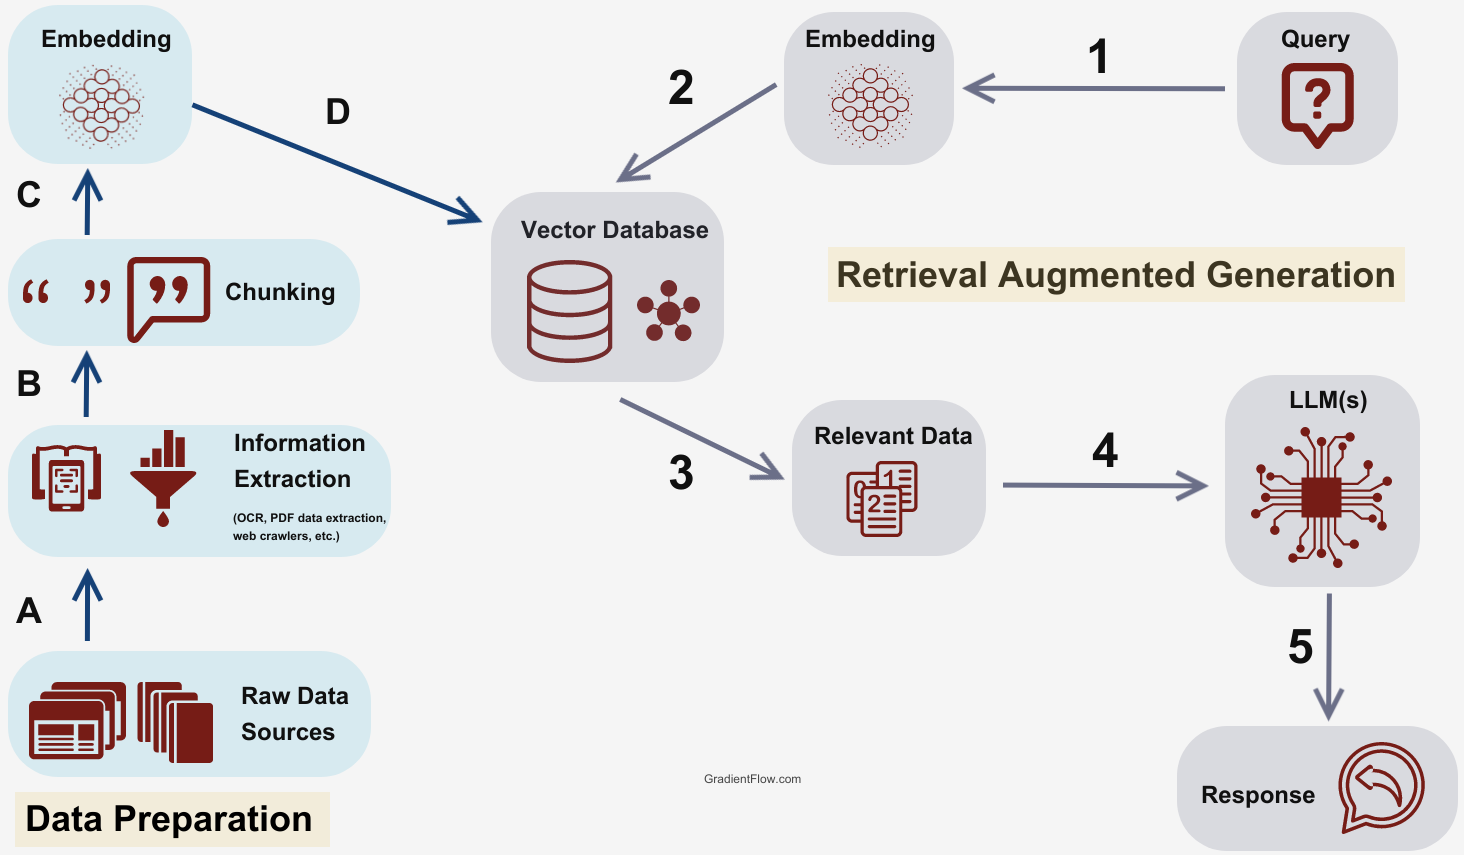

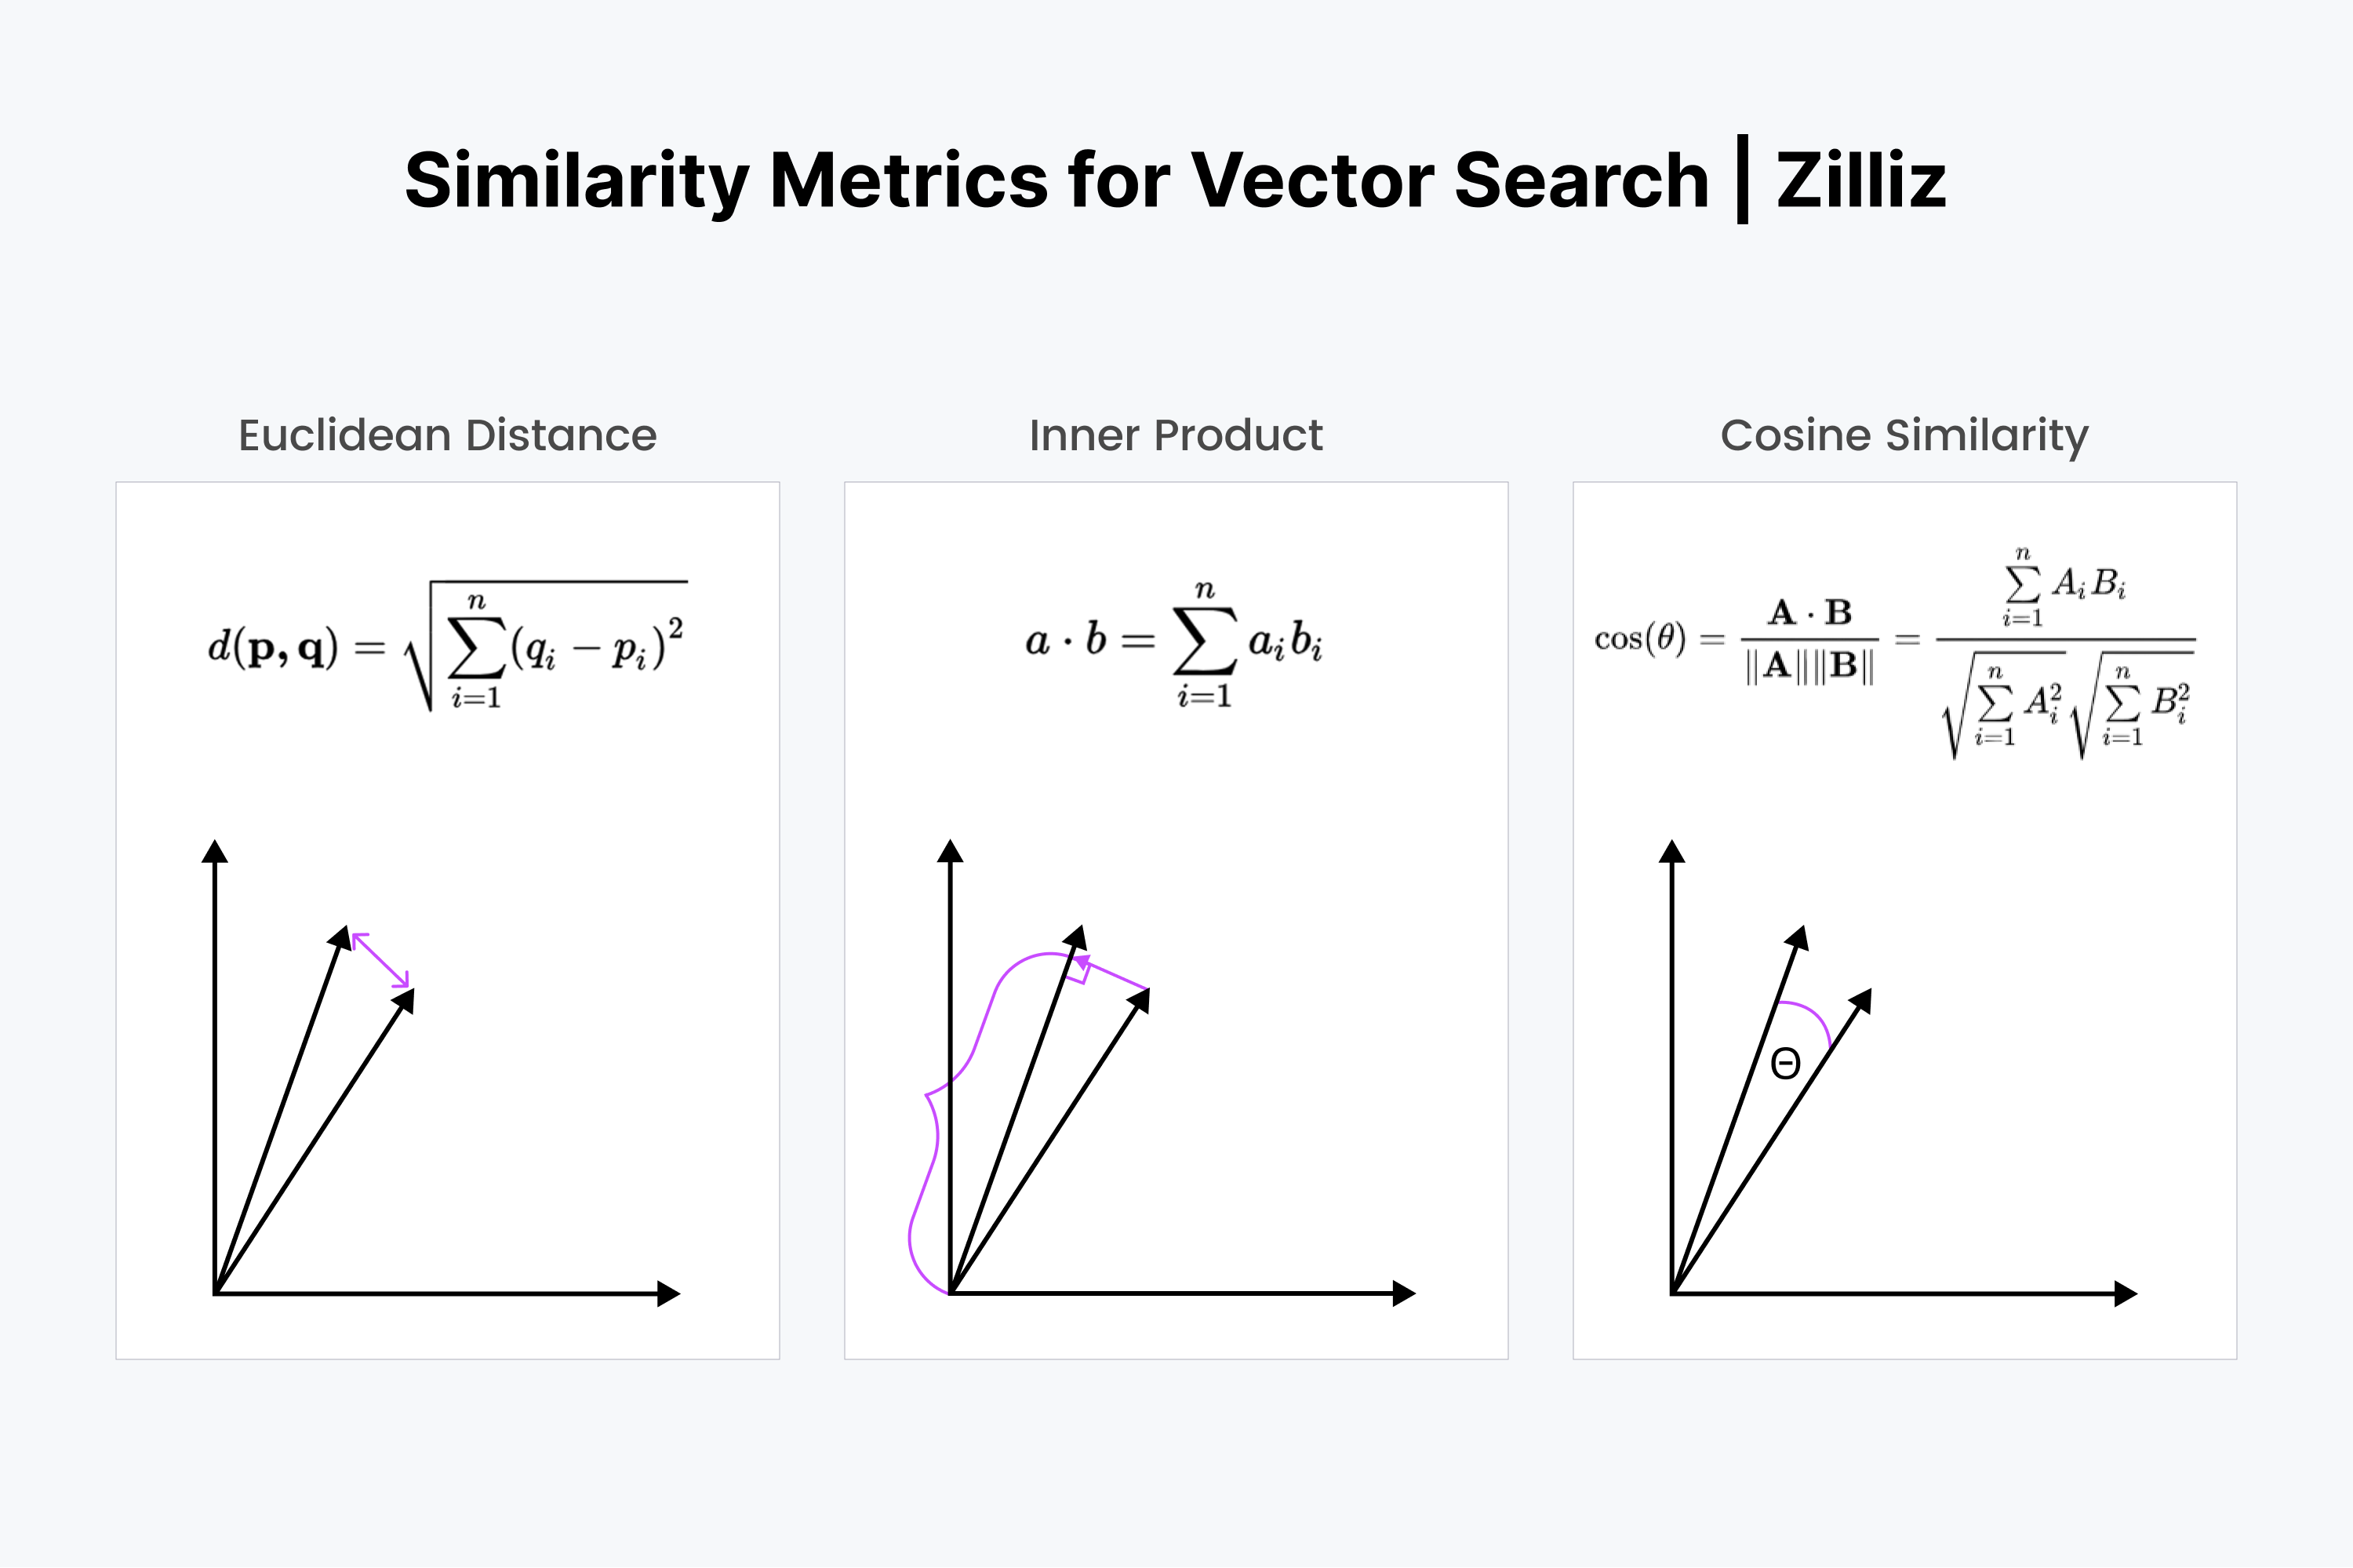

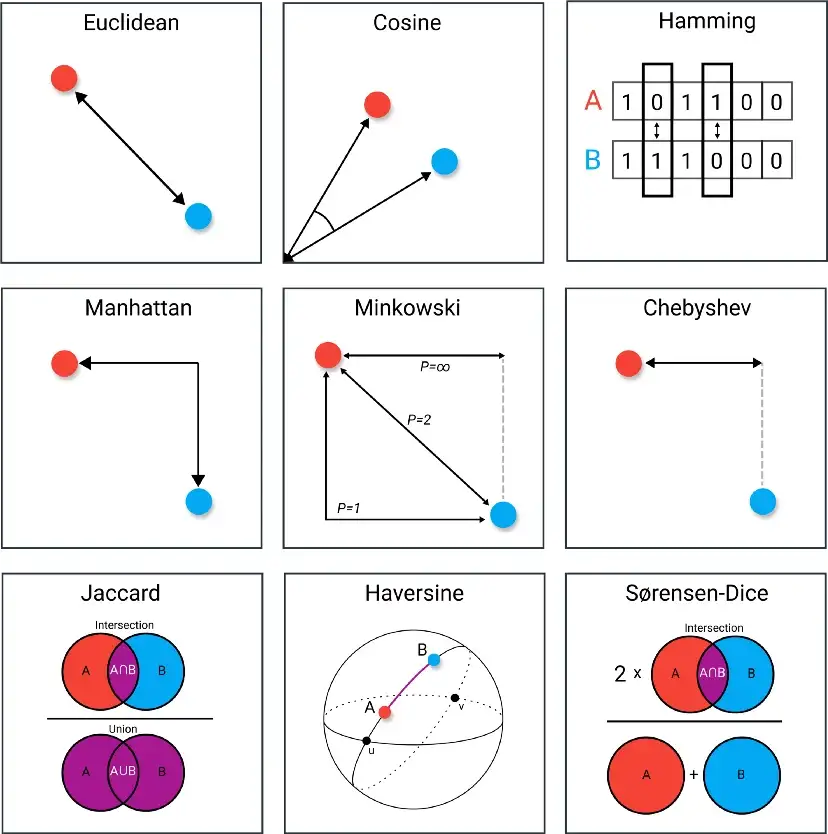

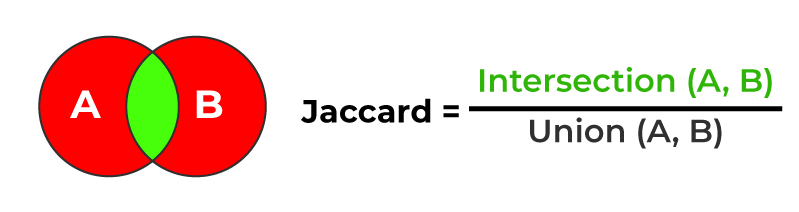

In [1]:
corpus_of_documents = [
    "Take a leisurely walk in the park and enjoy the fresh air.",
    "Visit a local museum and discover something new.",
    "Attend a live music concert and feel the rhythm.",
    "Go for a hike and admire the natural scenery.",
    "Have a picnic with friends and share some laughs.",
    "Explore a new cuisine by dining at an ethnic restaurant.",
    "Take a yoga class and stretch your body and mind.",
    "Join a local sports league and enjoy some friendly competition.",
    "Attend a workshop or lecture on a topic you're interested in.",
    "Visit an amusement park and ride the roller coasters."
]

In [2]:
corpus_of_documents

['Take a leisurely walk in the park and enjoy the fresh air.',
 'Visit a local museum and discover something new.',
 'Attend a live music concert and feel the rhythm.',
 'Go for a hike and admire the natural scenery.',
 'Have a picnic with friends and share some laughs.',
 'Explore a new cuisine by dining at an ethnic restaurant.',
 'Take a yoga class and stretch your body and mind.',
 'Join a local sports league and enjoy some friendly competition.',
 "Attend a workshop or lecture on a topic you're interested in.",
 'Visit an amusement park and ride the roller coasters.']

In [3]:
user_query="i am an indian and i live in india"

In [4]:
document="india is a country for the indians and for eveyone"

In [5]:
from collections import Counter
import math

In [6]:
query_tokens=user_query.lower().split(" ")

In [7]:

query_tokens

['i', 'am', 'an', 'indian', 'and', 'i', 'live', 'in', 'india']

In [8]:
document_tokens=document.lower().split(" ")

In [9]:
document_tokens

['india',
 'is',
 'a',
 'country',
 'for',
 'the',
 'indians',
 'and',
 'for',
 'eveyone']

In [10]:
query_counter=Counter(query_tokens)

In [11]:
query_counter

Counter({'i': 2,
         'am': 1,
         'an': 1,
         'indian': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'india': 1})

In [12]:
document_counter=Counter(document_tokens)

In [13]:
document_counter

Counter({'for': 2,
         'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'the': 1,
         'indians': 1,
         'and': 1,
         'eveyone': 1})

In [14]:
lst=[]
for token in query_counter.keys():
    lst.append(query_counter[token])

In [ ]:
lst = [query_counter[token] for token in query_counter.keys()]

In [15]:
lst #sentance vector = A

[2, 1, 1, 1, 1, 1, 1, 1]

In [16]:

for tokens in query_counter.keys() & document_counter.keys():
    print(tokens)

india
and


In [ ]:
# for query( vector A) and document(vector B) common token(dot product value non zero) are india(frequency=1), and(frozency=1) and india(frequency=1) , and(frozency=1)
#                                                                                                  [1,1]                                        [1,1]
# dot product of [1,1].[1,1] = 1+1 = 2


In [ ]:
mylist=[]
for tokens in query_counter.keys() & document_counter.keys():
    mylist.append(query_counter[tokens]*document_counter[tokens])  # dot product

In [ ]:
mylist = [query_counter[tokens]*document_counter[tokens] for tokens in query_counter.keys() & document_counter.keys()]

In [18]:
mylist

[1, 1]

In [19]:
dot_prod=sum(mylist)

In [20]:
dot_prod

2

In [21]:
# magnitude of query_vector A
query_magnitude= math.sqrt(sum(query_counter[token]**2 for token in query_counter))

In [23]:
query_magnitude

3.3166247903554

In [24]:
# magnitude of document vector B

document_magnitude=math.sqrt(sum(document_counter[token]**2 for token in document_counter))
document_magnitude

3.4641016151377544

In [25]:
similarty = dot_prod/(document_magnitude*query_magnitude)

In [26]:
similarty

0.17407765595569785

In [27]:
user_query="is yoga good for health"
document="yoga is very good for living healthy lifesytle."

In [28]:
def cosine_similarity(query, document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity

In [29]:

cosine_similarity(user_query,document)

0.6324555320336759

In [30]:
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_similarity(query, doc) # create similarity score for all documents
        similarities.append(similarity) # add similarity score to list
    return corpus_of_documents[similarities.index(max(similarities))] # retrieve similar documents base on max similarity score

In [31]:
user_input="i like fresh air."

In [32]:

relevant_document=return_response(user_input,corpus_of_documents)

In [33]:
relevant_document

'Take a leisurely walk in the park and enjoy the fresh air.'

In [34]:
# augument this response by using llama2 model

In [36]:
import requests
import json
full_response = []

In [42]:
full_response = []
prompt = """
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

url = 'http://localhost:11434/api/generate' # for ollama local model


data = {
    "model": "llama2",
    "prompt": prompt.format(user_input=user_input, relevant_document=relevant_document)
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)
print(response)


try:
    for line in response.iter_lines():
        # filter out keep-alive new lines
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            # print(decoded_line['response'])  # uncomment to results, token by token
            full_response.append(decoded_line['response'])
finally: # must return whether previous code execution succeeded or failed
    response.close()

<Response [404]>


KeyError: 'response'

In [ ]:
print(''.join(full_response))